In August 2018, the Jake Shearer was pushing ONEDREAM.  Here we break down a time line of their travels

In [2]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import patches
import pandas as pd
from pathlib import Path
import xarray as xr

%matplotlib inline

In [3]:
import geopandas
from shapely.geometry import Polygon

In [4]:
shapefile_dir = Path('/data/MIDOSS/shapefiles/')
vessel_type = 'atb'
month = '08'
innerdata = geopandas.read_file(shapefile_dir / 
                        f"{vessel_type}_2018_{month}.shp")

In [5]:
mesh = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask201702.nc')
tmask = mesh.tmask[0, 0]

In [6]:
innerdata.ST_DATE = pd.to_datetime(innerdata.ST_DATE) #, '%Y-%m-%d %H:%M:%S')
innerdata.EN_DATE = pd.to_datetime(innerdata.EN_DATE)
innerdata.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 43576 entries, 0 to 43575
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   MMSI_NUM  43576 non-null  float64       
 1   ST_DATE   43576 non-null  datetime64[ns]
 2   EN_DATE   43576 non-null  datetime64[ns]
 3   LENGTH    43576 non-null  int64         
 4   TO        29320 non-null  object        
 5   FROM_     29320 non-null  object        
 6   geometry  43576 non-null  geometry      
dtypes: datetime64[ns](2), float64(1), geometry(1), int64(1), object(2)
memory usage: 2.3+ MB


In [288]:
jake

,MMSI_NUM,ST_DATE,EN_DATE,LENGTH,TO,FROM_,geometry
26278,367740790.0,2018-08-01 00:33:41,2018-08-01 00:36:40,34,None,None,"LINESTRING (-122.60167 48.57167, -122.60000 48..."
26279,367740790.0,2018-08-01 00:45:40,2018-08-01 00:45:50,34,None,None,"LINESTRING (-122.60000 48.57167, -122.60114 48..."
26280,367740790.0,2018-08-01 00:45:50,2018-08-01 00:51:40,34,None,None,"LINESTRING (-122.60114 48.57275, -122.60000 48..."
26281,367740790.0,2018-08-01 00:51:40,2018-08-01 00:54:40,34,None,None,"LINESTRING (-122.60000 48.57167, -122.60167 48..."
26282,367740790.0,2018-08-01 00:54:40,2018-08-01 00:57:39,34,None,None,"LINESTRING (-122.60167 48.57167, -122.60000 48..."
...,...,...,...,...,...,...,...
32302,367740790.0,2018-08-31 23:48:48,2018-08-31 23:52:06,34,TLP Management Services LLC (TMS),TLP Management Services LLC (TMS),"LINESTRING (-122.35854 47.58293, -122.35833 47..."
32303,367740790.0,2018-08-31 23:52:06,2018-08-31 23:52:28,34,TLP Management Services LLC (TMS),TLP Management Services LLC (TMS),"LINESTRING (-122.35833 47.58167, -122.35861 47..."
32304,367740790.0,2018-08-31 23:52:28,2018-08-31 23:55:06,34,TLP Management Services LLC (TMS),TLP Management Services LLC (TMS),"LINESTRING (-122.35861 47.58294, -122.35833 47..."
32305,367740790.0,2018-08-31 23:55:06,2018-08-31 23:55:48,34,TLP Management Services LLC (TMS),TLP Management Services LLC (TMS),"LINESTRING (-122.35833 47.58167, -122.35858 47..."


In [7]:
jake = innerdata[innerdata.MMSI_NUM == 367740790]
jake.index

Int64Index([26278, 26279, 26280, 26281, 26282, 26283, 26284, 26285, 26286,
            26287,
            ...
            32297, 32298, 32299, 32300, 32301, 32302, 32303, 32304, 32305,
            32306],
           dtype='int64', length=6029)

In [324]:
def voyage_changes(inner_data, jake):
    diffy = jake[((jake.TO != jake.TO.shift(1)) & ((jake.TO == jake.TO) | (jake.TO.shift(1) == jake.TO.shift(1)))) |
            ((jake.FROM_ != jake.FROM_.shift(1)) & ((jake.FROM_ == jake.FROM_) | (jake.FROM_.shift(1) == jake.FROM_.shift(1))))]
    gap = []
    for ii in jake.index:
        if innerdata.iloc[ii+1].ST_DATE - innerdata.iloc[ii].EN_DATE > dt.timedelta(hours=4):
            gap.append(ii)
    in_gap = set(gap)
    in_diffy = set(diffy.index)
    changev = (gap + list(in_diffy - in_gap))
    return sorted(changev)
    

In [234]:
diffy = jake[((jake.TO != jake.TO.shift(1)) & ((jake.TO == jake.TO) | (jake.TO.shift(1) == jake.TO.shift(1)))) |
            ((jake.FROM_ != jake.FROM_.shift(1)) & ((jake.FROM_ == jake.FROM_) | (jake.FROM_.shift(1) == jake.FROM_.shift(1))))]
diffy.index

Int64Index([26309, 26444, 26449, 26466, 26485, 26509, 26577, 26585, 26611,
            26623, 26695, 26703, 26742, 26750, 26783, 27328, 27506, 28348,
            28465, 28527, 28544, 28635, 28636, 28909, 28931, 28995, 29090,
            29147, 29969, 30817, 30828, 31008, 31188, 31219, 31226, 31303,
            31343, 31353, 31357, 31368, 31704, 31826, 31910, 31989, 32106,
            32267, 32272, 32282, 32301, 32302],
           dtype='int64')

In [ ]:
for jj, index in enumerate(diffy.index):
    print (f'Trip Number {jj}')
    print (jake[jake.index == index-1])
    print (jake[jake.index == index])
    print ('-----------------------------------------------------------------')

In [277]:
jakel = jake.shift(1)

In [282]:
jake.index

Int64Index([26278, 26279, 26280, 26281, 26282, 26283, 26284, 26285, 26286,
            26287,
            ...
            32297, 32298, 32299, 32300, 32301, 32302, 32303, 32304, 32305,
            32306],
           dtype='int64', length=6029)

In [294]:
gap = []
for ii in jake.index:
    if innerdata.iloc[ii+1].ST_DATE - innerdata.iloc[ii].EN_DATE > dt.timedelta(hours=4):
        gap.append(ii)
gap

[27505,
 28543,
 28634,
 28635,
 28908,
 28920,
 28943,
 29146,
 29968,
 30827,
 31347,
 31909,
 32270,
 32281]

In [304]:
in_gap = set(gap)
in_diffy = set(diffy.index)
changev = gap + list(in_diffy - in_gap)
print (len(gap), len(diffy.index), len(changev))

14 50 63


In [325]:
cc = voyage_changes(innerdata, jake)
cc

[26309,
 26444,
 26449,
 26466,
 26485,
 26509,
 26577,
 26585,
 26611,
 26623,
 26695,
 26703,
 26742,
 26750,
 26783,
 27328,
 27505,
 27506,
 28348,
 28465,
 28527,
 28543,
 28544,
 28634,
 28635,
 28636,
 28908,
 28909,
 28920,
 28931,
 28943,
 28995,
 29090,
 29146,
 29147,
 29968,
 29969,
 30817,
 30827,
 30828,
 31008,
 31188,
 31219,
 31226,
 31303,
 31343,
 31347,
 31353,
 31357,
 31368,
 31704,
 31826,
 31909,
 31910,
 31989,
 32106,
 32267,
 32270,
 32272,
 32281,
 32282,
 32301,
 32302]

In [320]:
cc

In [296]:
for ii in gap:
    print (jake[jake.index == ii], jake[jake.index == ii+1])
    print ('----------------------------------------------------------')

          MMSI_NUM             ST_DATE             EN_DATE  LENGTH  TO  \
27505  367740790.0 2018-08-03 19:26:03 2018-08-03 19:26:45      34  US   

         FROM_                                           geometry  
27505  Pacific  LINESTRING (-124.79198 46.80198, -124.79127 46...             MMSI_NUM             ST_DATE             EN_DATE  LENGTH  TO FROM_  \
27506  367740790.0 2018-08-11 07:48:25 2018-08-11 07:50:12      34  US    US   

                                                geometry  
27506  LINESTRING (-124.79833 46.81500, -124.80282 46...  
----------------------------------------------------------
          MMSI_NUM             ST_DATE             EN_DATE  LENGTH    TO  \
28543  367740790.0 2018-08-14 02:24:18 2018-08-14 02:24:31      34  None   

      FROM_                                           geometry  
28543  None  LINESTRING (-122.76378 48.86345, -122.76333 48...             MMSI_NUM             ST_DATE             EN_DATE  LENGTH  \
28544  367740790.0 2018-

In [271]:
jake.ST_DATE[(jake.index > 27504) & (jake.index < 27510)]
jake.ST_DATE[jake.index == 27506].item() - jake.ST_DATE[jake.index == 27505].item() > dt.timedelta(hours=4)

True

<ipython-input-217-27d17f3279be>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(mesh.nav_lon, mesh.nav_lat, tmask)


5989 MMSI_NUM                                          367740790.0
ST_DATE                                   2018-08-31 06:57:27
EN_DATE                                   2018-08-31 06:58:05
LENGTH                                                     34
TO                                                       None
FROM_                                                    None
geometry    LINESTRING (-122.3585999998303 47.582855000089...
Name: 32267, dtype: object
5994 MMSI_NUM                                          367740790.0
ST_DATE                                   2018-08-31 17:43:06
EN_DATE                                   2018-08-31 17:43:11
LENGTH                                                     34
TO                                                         US
FROM_                       TLP Management Services LLC (TMS)
geometry    LINESTRING (-122.3583333329528 47.583333333065...
Name: 32272, dtype: object


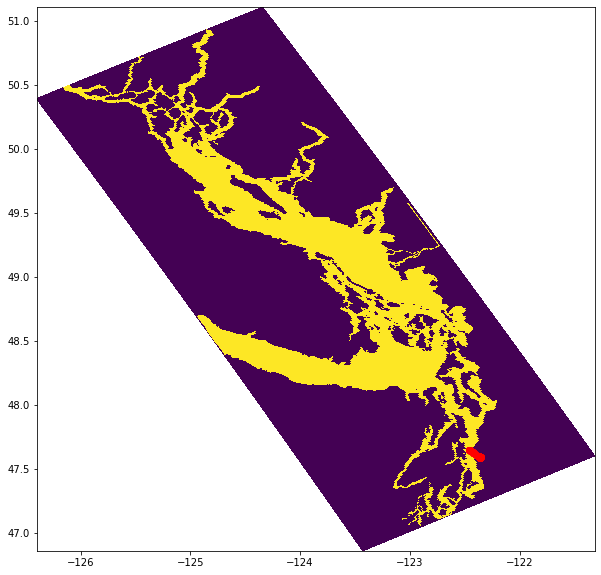

In [217]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.pcolormesh(mesh.nav_lon, mesh.nav_lat, tmask)
for jj, (index, row) in enumerate(jake[rowst:rowen].iterrows()):
    if jake.iloc[jj+rowst].TO != jake.iloc[jj-1+rowst].TO or jake.iloc[jj+rowst].FROM_ != jake.iloc[jj-1+rowst].FROM_:
        print (jj+rowst, jake.iloc[jj+rowst])
    ax.plot([row.geometry.coords[0][0],
              row.geometry.coords[1][0]],
             [row.geometry.coords[0][1],
              row.geometry.coords[1][1]], 'ro-')

In [19]:
cure.geometry

10170    LINESTRING (-123.00352 49.29210, -123.00333 49...
10171    LINESTRING (-123.00353 49.29209, -123.00333 49...
10172    LINESTRING (-123.00333 49.29167, -123.00356 49...
10173    LINESTRING (-123.00352 49.29209, -123.00333 49...
10174    LINESTRING (-123.00333 49.29167, -123.00352 49...
                               ...                        
12689    LINESTRING (-125.96674 50.42272, -125.96782 50...
12690    LINESTRING (-125.96782 50.42319, -126.00288 50...
12691    LINESTRING (-126.00288 50.43890, -126.00473 50...
12692    LINESTRING (-126.00473 50.43960, -126.00582 50...
12693    LINESTRING (-126.00582 50.44000, -126.02000 50...
Name: geometry, Length: 2524, dtype: geometry

<ipython-input-111-b3cacc112ea3>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(mesh.nav_lon, mesh.nav_lat, tmask)


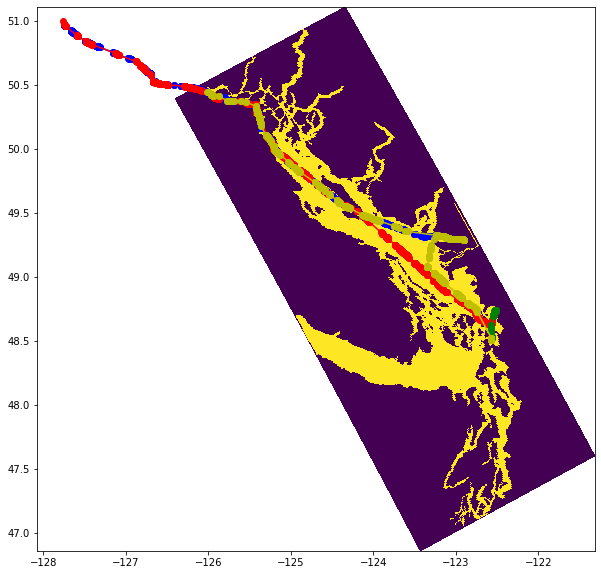

In [111]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.pcolormesh(mesh.nav_lon, mesh.nav_lat, tmask)
for jj, (index, row) in enumerate(cure.iterrows()):
    if (dt.datetime.strptime(row.ST_DATE, '%Y-%m-%d %H:%M:%S') < dt.datetime(2018, 1, 10)):
        ax.plot([row.geometry.coords[0][0],
              row.geometry.coords[1][0]],
             [row.geometry.coords[0][1],
              row.geometry.coords[1][1]], 'bo-')
    elif jj > 1950:
        ax.plot([row.geometry.coords[0][0],
              row.geometry.coords[1][0]],
             [row.geometry.coords[0][1],
              row.geometry.coords[1][1]], 'yo-')
    elif jj > 1650:
        ax.plot([row.geometry.coords[0][0],
              row.geometry.coords[1][0]],
             [row.geometry.coords[0][1],
              row.geometry.coords[1][1]], 'go-')
    else:
        ax.plot([row.geometry.coords[0][0],
              row.geometry.coords[1][0]],
             [row.geometry.coords[0][1],
              row.geometry.coords[1][1]], 'ro-')

 


In [117]:
jake = innerdata[innerdata.MMSI_NUM == 367740790]

jake[0::100]

,MMSI_NUM,ST_DATE,EN_DATE,LENGTH,TO,FROM_,geometry
17910,367740790.0,2018-01-12 13:06:05,2018-01-12 13:06:31,34,None,None,"LINESTRING (-122.34500 47.57333, -122.34528 47..."


In [118]:
shapefile_dir = Path('/data/MIDOSS/shapefiles/')
vessel_type = 'atb'
month = '08'
innerdata = geopandas.read_file(shapefile_dir / 
                        f"{vessel_type}_2018_{month}.shp")

In [120]:
cure = innerdata[innerdata.MMSI_NUM == 368006870]
cure

,MMSI_NUM,ST_DATE,EN_DATE,LENGTH,TO,FROM_,geometry
11232,368006870.0,2018-08-01 00:01:26,2018-08-01 00:10:26,178,Pacific,Canada,"LINESTRING (-127.07333 50.73667, -127.10333 50..."
11233,368006870.0,2018-08-01 00:10:26,2018-08-01 00:28:25,178,Pacific,Canada,"LINESTRING (-127.10333 50.74500, -127.16667 50..."
11234,368006870.0,2018-08-01 00:28:25,2018-08-01 00:34:21,178,Pacific,Canada,"LINESTRING (-127.16667 50.76000, -127.18778 50..."
11235,368006870.0,2018-08-01 00:34:21,2018-08-01 00:34:26,178,Pacific,Canada,"LINESTRING (-127.18778 50.76443, -127.18667 50..."
11236,368006870.0,2018-08-01 00:34:26,2018-08-01 00:43:26,178,Pacific,Canada,"LINESTRING (-127.18667 50.76333, -127.22000 50..."
...,...,...,...,...,...,...,...
16736,368006870.0,2018-08-31 19:09:29,2018-08-31 19:09:50,178,None,None,"LINESTRING (-122.57667 48.50833, -122.57807 48..."
16737,368006870.0,2018-08-31 19:09:50,2018-08-31 19:12:27,178,None,None,"LINESTRING (-122.57807 48.50954, -122.57667 48..."
16738,368006870.0,2018-08-31 19:12:28,2018-08-31 19:12:52,178,None,None,"LINESTRING (-122.57667 48.50833, -122.57807 48..."
16739,368006870.0,2018-08-31 19:12:52,2018-08-31 19:15:28,178,None,None,"LINESTRING (-122.57807 48.50958, -122.57667 48..."


<ipython-input-121-12e71f75810b>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(mesh.nav_lon, mesh.nav_lat, tmask)


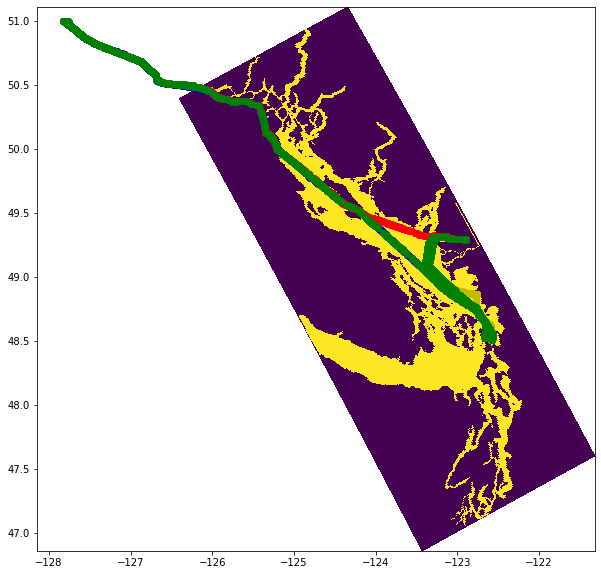

In [121]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.pcolormesh(mesh.nav_lon, mesh.nav_lat, tmask)
for jj, (index, row) in enumerate(cure.iterrows()):
    if jj < 1000:
        ax.plot([row.geometry.coords[0][0],
              row.geometry.coords[1][0]],
             [row.geometry.coords[0][1],
              row.geometry.coords[1][1]], 'bo-')
    elif jj < 2000:
        ax.plot([row.geometry.coords[0][0],
              row.geometry.coords[1][0]],
             [row.geometry.coords[0][1],
              row.geometry.coords[1][1]], 'yo-')
    elif jj > 3000:
        ax.plot([row.geometry.coords[0][0],
              row.geometry.coords[1][0]],
             [row.geometry.coords[0][1],
              row.geometry.coords[1][1]], 'go-')
    elif jj > 4000:
        ax.plot([row.geometry.coords[0][0],
              row.geometry.coords[1][0]],
             [row.geometry.coords[0][1],
              row.geometry.coords[1][1]], 'co-')
    elif jj > 5000:
        ax.plot([row.geometry.coords[0][0],
              row.geometry.coords[1][0]],
             [row.geometry.coords[0][1],
              row.geometry.coords[1][1]], 'mo-')
    else:
        ax.plot([row.geometry.coords[0][0],
              row.geometry.coords[1][0]],
             [row.geometry.coords[0][1],
              row.geometry.coords[1][1]], 'ro-')

In [335]:
jake

,MMSI_NUM,ST_DATE,EN_DATE,LENGTH,TO,FROM_,geometry
26278,367740790.0,2018-08-01 00:33:41,2018-08-01 00:36:40,34,None,None,"LINESTRING (-122.60167 48.57167, -122.60000 48..."
26279,367740790.0,2018-08-01 00:45:40,2018-08-01 00:45:50,34,None,None,"LINESTRING (-122.60000 48.57167, -122.60114 48..."
26280,367740790.0,2018-08-01 00:45:50,2018-08-01 00:51:40,34,None,None,"LINESTRING (-122.60114 48.57275, -122.60000 48..."
26281,367740790.0,2018-08-01 00:51:40,2018-08-01 00:54:40,34,None,None,"LINESTRING (-122.60000 48.57167, -122.60167 48..."
26282,367740790.0,2018-08-01 00:54:40,2018-08-01 00:57:39,34,None,None,"LINESTRING (-122.60167 48.57167, -122.60000 48..."
...,...,...,...,...,...,...,...
32302,367740790.0,2018-08-31 23:48:48,2018-08-31 23:52:06,34,TLP Management Services LLC (TMS),TLP Management Services LLC (TMS),"LINESTRING (-122.35854 47.58293, -122.35833 47..."
32303,367740790.0,2018-08-31 23:52:06,2018-08-31 23:52:28,34,TLP Management Services LLC (TMS),TLP Management Services LLC (TMS),"LINESTRING (-122.35833 47.58167, -122.35861 47..."
32304,367740790.0,2018-08-31 23:52:28,2018-08-31 23:55:06,34,TLP Management Services LLC (TMS),TLP Management Services LLC (TMS),"LINESTRING (-122.35861 47.58294, -122.35833 47..."
32305,367740790.0,2018-08-31 23:55:06,2018-08-31 23:55:48,34,TLP Management Services LLC (TMS),TLP Management Services LLC (TMS),"LINESTRING (-122.35833 47.58167, -122.35858 47..."


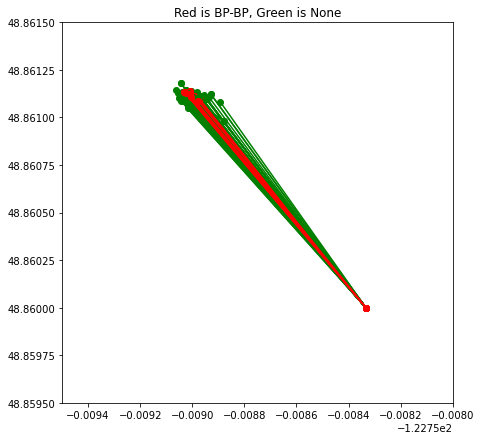

In [357]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
for jj, (index, row) in enumerate(jake.iterrows()):
    if index >= 26509 and index <= 26749:
        if row.TO == 'BP Cherry Point Refinery':
            ax.plot([row.geometry.coords[0][0],
              row.geometry.coords[1][0]],
             [row.geometry.coords[0][1],
              row.geometry.coords[1][1]], 'ro-')
        else:
            ax.plot([row.geometry.coords[0][0],
              row.geometry.coords[1][0]],
             [row.geometry.coords[0][1],
              row.geometry.coords[1][1]], 'go-')
ax.set_xlim(-122.7595, -122.758);
ax.set_ylim(48.8595, 48.8615);
ax.set_title("Red is BP-BP, Green is None");

In [371]:
count = 0
for ii in range(26694, 26704):
    print (jake[jake.index == ii])
    print ('----------------------------------------------------------')
count

          MMSI_NUM             ST_DATE             EN_DATE  LENGTH    TO  \
26694  367740790.0 2018-08-02 10:21:09 2018-08-02 10:22:44      34  None   

      FROM_                                           geometry  
26694  None  LINESTRING (-122.75833 48.86000, -122.75901 48...  
----------------------------------------------------------
          MMSI_NUM             ST_DATE             EN_DATE  LENGTH  \
26695  367740790.0 2018-08-02 10:25:44 2018-08-02 10:30:09      34   

                             TO                     FROM_  \
26695  BP Cherry Point Refinery  BP Cherry Point Refinery   

                                                geometry  
26695  LINESTRING (-122.75902 48.86110, -122.75833 48...  
----------------------------------------------------------
          MMSI_NUM             ST_DATE             EN_DATE  LENGTH  \
26696  367740790.0 2018-08-02 10:33:09 2018-08-02 10:33:15      34   

                             TO                     FROM_  \
26696  BP Cherr

0

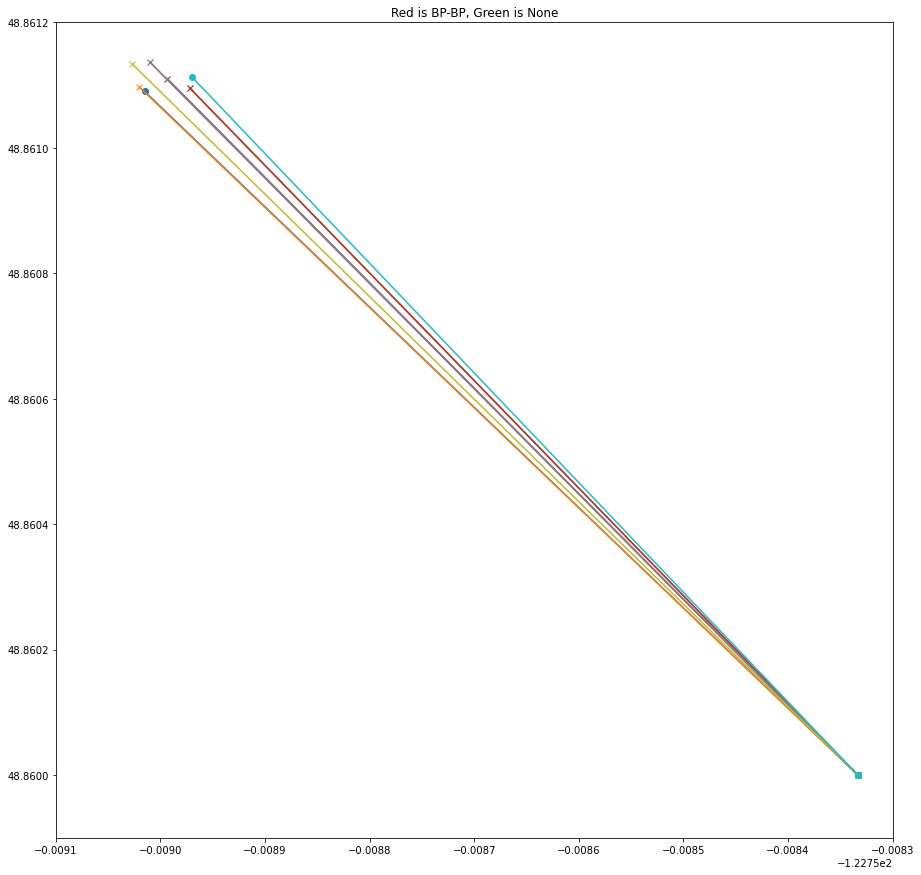

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
for jj, (index, row) in enumerate(jake.iterrows()):
    if index >= 26694 and index <= 26703:
        if row.TO == 'BP Cherry Point Refinery':
            ax.plot([row.geometry.coords[0][0],
              row.geometry.coords[1][0]],
             [row.geometry.coords[0][1],
              row.geometry.coords[1][1]], 'x-')
        else:
            ax.plot([row.geometry.coords[0][0],
              row.geometry.coords[1][0]],
             [row.geometry.coords[0][1],
              row.geometry.coords[1][1]], 'o-')
ax.set_xlim(-122.7591, -122.7583);
ax.set_ylim(48.8599, 48.8612);
ax.set_title("Red is BP-BP, Green is None");

In [142]:
cure[cure.TO != cure.TO].count()

MMSI_NUM    563
ST_DATE     563
EN_DATE     563
LENGTH      563
TO            0
FROM_         0
geometry    563
dtype: int64

In [174]:
# Suncor Vancouver (36)
# Westridge Marine Terminal (19)
# Shell Puget Sound Refinery(358)
# BP Cherry Point Refinery (471)
cure.iloc[300::500].TO

11532                       Pacific
12032      BP Cherry Point Refinery
12532                          None
13032                        Canada
13532                        Canada
14032                       Pacific
14532                       Pacific
15032                       Pacific
15532                            US
16032                        Canada
16532    Shell Puget Sound Refinery
Name: TO, dtype: object

In [165]:
2094+798+1170+563+471+19+358+36

5509

In [190]:
cure[cure.TO == 'BP Cherry Point Refinery'][500:100:5]

,MMSI_NUM,ST_DATE,EN_DATE,LENGTH,TO,FROM_,geometry


In [206]:
# Suncor Vancouver 19
# BP Cherry Point Refinery 107
# Chevron Stanovan 277
# Shell Puget Sound Refinery 572
cure[cure.FROM_ == 'Chevron Stanovan'].count()

MMSI_NUM    277
ST_DATE     277
EN_DATE     277
LENGTH      277
TO          277
FROM_       277
geometry    277
dtype: int64

In [207]:
563+2310+511+1150+572+107+19+277

5509

In [215]:
cure[cure.FROM_ == 'Shell Puget Sound Refinery'][500:750:5]

,MMSI_NUM,ST_DATE,EN_DATE,LENGTH,TO,FROM_,geometry
13379,368006870.0,2018-08-11 19:01:42,2018-08-11 19:02:23,178,Canada,Shell Puget Sound Refinery,"LINESTRING (-123.15231 49.31664, -123.15039 49..."
13384,368006870.0,2018-08-11 19:03:23,2018-08-11 19:04:12,178,Canada,Shell Puget Sound Refinery,"LINESTRING (-123.14781 49.31634, -123.14551 49..."
13389,368006870.0,2018-08-11 19:05:58,2018-08-11 19:06:22,178,Canada,Shell Puget Sound Refinery,"LINESTRING (-123.14112 49.31555, -123.14035 49..."
13394,368006870.0,2018-08-11 19:18:18,2018-08-11 19:21:19,178,Canada,Shell Puget Sound Refinery,"LINESTRING (-123.11167 49.30167, -123.10167 49..."
13399,368006870.0,2018-08-11 19:39:18,2018-08-11 19:39:34,178,Canada,Shell Puget Sound Refinery,"LINESTRING (-123.04667 49.29500, -123.04605 49..."
13404,368006870.0,2018-08-11 19:57:19,2018-08-11 20:00:18,178,Canada,Shell Puget Sound Refinery,"LINESTRING (-123.00333 49.29500, -123.00000 49..."
16664,368006870.0,2018-08-31 00:53:18,2018-08-31 00:54:27,178,Shell Puget Sound Refinery,Shell Puget Sound Refinery,"LINESTRING (-122.58122 48.51811, -122.58000 48..."
16669,368006870.0,2018-08-31 01:12:27,2018-08-31 01:15:32,178,Shell Puget Sound Refinery,Shell Puget Sound Refinery,"LINESTRING (-122.57667 48.51833, -122.57333 48..."
16674,368006870.0,2018-08-31 01:27:28,2018-08-31 01:30:28,178,Shell Puget Sound Refinery,Shell Puget Sound Refinery,"LINESTRING (-122.56833 48.51500, -122.56833 48..."
16679,368006870.0,2018-08-31 01:54:28,2018-08-31 01:57:06,178,Shell Puget Sound Refinery,Shell Puget Sound Refinery,"LINESTRING (-122.57167 48.51333, -122.57191 48..."


In [222]:
cure.iloc[2500:3000:10]

,MMSI_NUM,ST_DATE,EN_DATE,LENGTH,TO,FROM_,geometry
13732,368006870.0,2018-08-12 17:09:20,2018-08-12 17:09:33,178,Pacific,Canada,"LINESTRING (-124.36167 49.56167, -124.36358 49..."
13742,368006870.0,2018-08-12 17:23:52,2018-08-12 17:24:18,178,Pacific,Canada,"LINESTRING (-124.39407 49.57232, -124.39333 49..."
13752,368006870.0,2018-08-12 17:45:18,2018-08-12 17:46:33,178,Pacific,Canada,"LINESTRING (-124.43333 49.59000, -124.43709 49..."
13762,368006870.0,2018-08-12 18:16:31,2018-08-12 18:17:11,178,Pacific,Canada,"LINESTRING (-124.48836 49.62153, -124.48951 49..."
13772,368006870.0,2018-08-12 18:25:51,2018-08-12 18:27:18,178,Pacific,Canada,"LINESTRING (-124.50432 49.63094, -124.50667 49..."
13782,368006870.0,2018-08-12 18:40:11,2018-08-12 18:40:31,178,Pacific,Canada,"LINESTRING (-124.52809 49.64620, -124.52863 49..."
13792,368006870.0,2018-08-12 18:45:12,2018-08-12 18:45:19,178,Pacific,Canada,"LINESTRING (-124.53716 49.65079, -124.53667 49..."
13802,368006870.0,2018-08-12 18:47:30,2018-08-12 18:47:52,178,Pacific,Canada,"LINESTRING (-124.54159 49.65284, -124.54227 49..."
13812,368006870.0,2018-08-12 18:57:19,2018-08-12 18:59:11,178,Pacific,Canada,"LINESTRING (-124.56000 49.66000, -124.56402 49..."
13822,368006870.0,2018-08-12 19:39:18,2018-08-12 19:42:12,178,Pacific,Canada,"LINESTRING (-124.63833 49.70167, -124.64443 49..."


In [257]:
cure = innerdata[innerdata.MMSI_NUM == 367740790]
cure[5800:6100:5]

,MMSI_NUM,ST_DATE,EN_DATE,LENGTH,TO,FROM_,geometry
32078,367740790.0,2018-08-31 02:16:27,2018-08-31 02:17:27,34,US,US,"LINESTRING (-122.76004 48.15926, -122.75648 48..."
32083,367740790.0,2018-08-31 02:19:27,2018-08-31 02:26:08,34,US,US,"LINESTRING (-122.74922 48.15335, -122.72781 48..."
32088,367740790.0,2018-08-31 02:33:07,2018-08-31 02:33:18,34,US,US,"LINESTRING (-122.70460 48.12608, -122.70395 48..."
32093,367740790.0,2018-08-31 02:35:58,2018-08-31 02:37:05,34,US,US,"LINESTRING (-122.69447 48.11980, -122.69000 48..."
32098,367740790.0,2018-08-31 02:43:05,2018-08-31 02:43:08,34,US,US,"LINESTRING (-122.66833 48.10333, -122.66914 48..."
32103,367740790.0,2018-08-31 02:46:16,2018-08-31 02:49:05,34,US,US,"LINESTRING (-122.66470 48.09600, -122.66167 48..."
32108,367740790.0,2018-08-31 02:55:48,2018-08-31 02:56:07,34,TLP Management Services LLC (TMS),US,"LINESTRING (-122.65897 48.07527, -122.65882 48..."
32113,367740790.0,2018-08-31 03:03:27,2018-08-31 03:04:04,34,TLP Management Services LLC (TMS),US,"LINESTRING (-122.65526 48.05810, -122.65333 48..."
32118,367740790.0,2018-08-31 03:23:18,2018-08-31 03:23:58,34,TLP Management Services LLC (TMS),US,"LINESTRING (-122.63154 48.01118, -122.63026 48..."
32123,367740790.0,2018-08-31 03:36:08,2018-08-31 03:36:47,34,TLP Management Services LLC (TMS),US,"LINESTRING (-122.60708 47.98022, -122.60574 47..."


In [219]:
1+2

3

In [359]:

1/6

0.16666666666666666